In [28]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import re

data = pd.read_csv("roadNet-CA.txt")

data.columns = ["X"]
data = data.iloc[3:]
ax = list(data["X"])

data

,X
3,0\t1
4,0\t2
5,0\t469
6,1\t0
7,1\t6
...,...
5533212,1971240\t1971238
5533213,1971250\t1971249
5533214,1971269\t1971268
5533215,1971277\t1971276


In [29]:
pat = r'(\d+).*?(\d+)'

to_list = []
from_list = []
for row in ax:
    match = re.search(pat, row)
    if match:
        result1 = match.group(1)
        result2 = match.group(2)
        from_list.append(result1)
        to_list.append(result2)

In [30]:
to_list

['1',
 '2',
 '469',
 '0',
 '6',
 '385',
 '0',
 '3',
 '0',
 '380',
 '37415',
 '1',
 '5',
 '1',
 '384',
 '386',
 '2',
 '4',
 '419',
 '422',
 '3',
 '5',
 '98',
 '420',
 '3',
 '420',
 '35698',
 '3',
 '183',
 '423',
 '37415',
 '4',
 '6',
 '98',
 '4',
 '5',
 '470',
 '35729',
 '4',
 '419',
 '35709',
 '8',
 '9',
 '79',
 '7',
 '33',
 '7',
 '10',
 '84',
 '7',
 '78',
 '119',
 '8',
 '32',
 '34',
 '9',
 '11',
 '84',
 '110',
 '9',
 '10',
 '83',
 '85',
 '10',
 '12',
 '110',
 '10',
 '11',
 '111',
 '112',
 '11',
 '13',
 '95',
 '108',
 '12',
 '14',
 '94',
 '95',
 '12',
 '109',
 '113',
 '123',
 '12',
 '13',
 '96',
 '13',
 '15',
 '16',
 '77',
 '13',
 '77',
 '93',
 '14',
 '14',
 '17',
 '14',
 '17',
 '94',
 '16',
 '18',
 '77',
 '3254',
 '17',
 '19',
 '3254',
 '17',
 '18',
 '3255',
 '36971',
 '18',
 '20',
 '23',
 '19',
 '21',
 '22',
 '19',
 '24',
 '25',
 '20',
 '20',
 '23',
 '23',
 '26',
 '27',
 '25',
 '25',
 '28',
 '29',
 '27',
 '27',
 '30',
 '3255',
 '29',
 '31',
 '3247',
 '3253',
 '29',
 '3253',
 '3254',


In [31]:
road_df = pd.DataFrame({"From_Node": from_list, "To_Node": to_list}) ##

In [32]:
road_df

,From_Node,To_Node
0,0,1
1,0,2
2,0,469
3,1,0
4,1,6
...,...,...
5533209,1971240,1971238
5533210,1971250,1971249
5533211,1971269,1971268
5533212,1971277,1971276


In [33]:
# road_df['From_Node'].max()

'999999'

In [36]:
# road_df['To_Node'].max()

'999999'

In [37]:
# Data is too big to handle, so trim the data with reasonable size.

node_filter = 100 # Keep the rows with the node number less than 100.

road_df['From_Node'] = pd.to_numeric(road_df['From_Node'])
road_df['To_Node'] = pd.to_numeric(road_df['To_Node'])

road_df = road_df[(road_df['From_Node'] <= node_filter) & (road_df['To_Node'] <= node_filter)]


In [38]:
road_df

,From_Node,To_Node
0,0,1
1,0,2
3,1,0
4,1,6
6,2,0
...,...,...
473,93,94
478,96,95
479,96,97
490,99,100


In [39]:
road_df['capacity'] = 5


C:\Users\user\AppData\Local\Temp\ipykernel_16144\4147028678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_df['capacity'] = 5


In [40]:
road_df

,From_Node,To_Node,capacity
0,0,1,5
1,0,2,5
3,1,0,5
4,1,6,5
6,2,0,5
...,...,...,...
473,93,94,5
478,96,95,5
479,96,97,5
490,99,100,5


In [41]:
import networkx as nx

In [42]:
G = nx.DiGraph()

for _, row in road_df.iterrows():
    G.add_edge(row['From_Node'], row['To_Node'], capacity=row['capacity'])

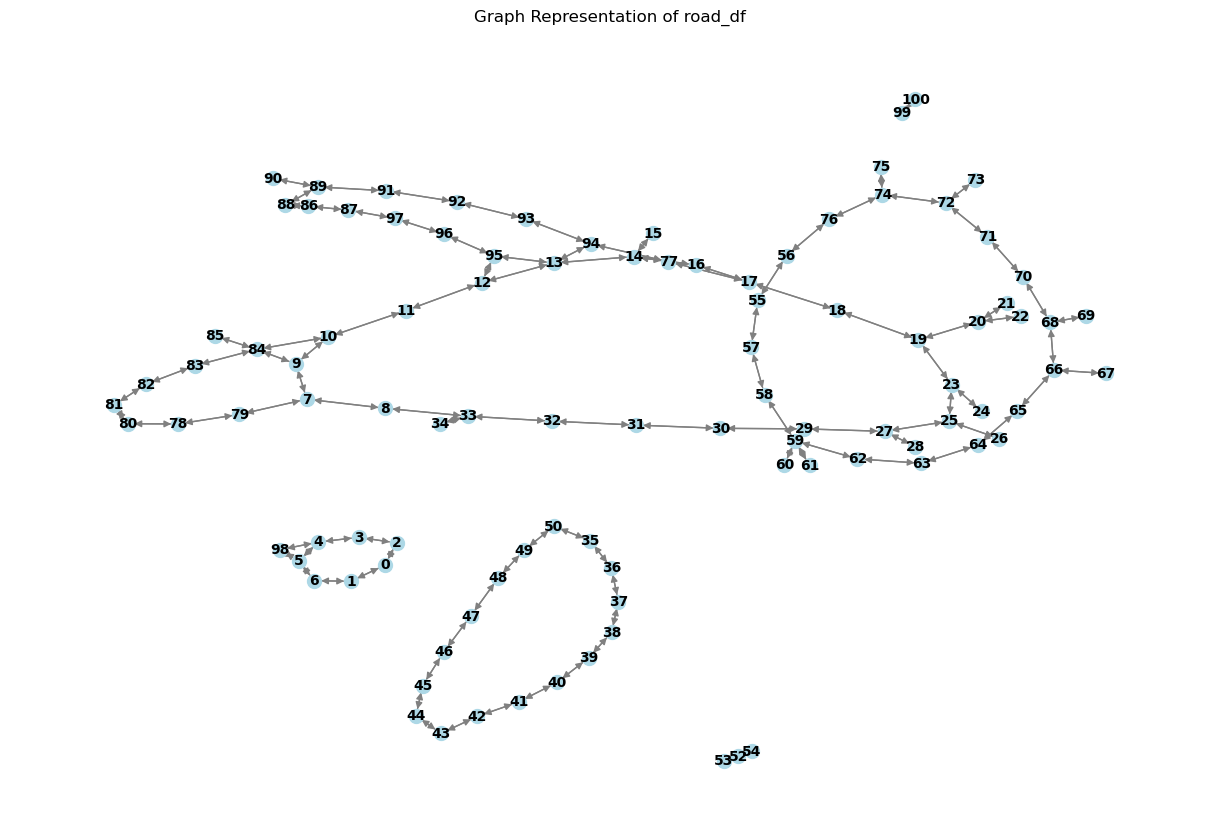

In [51]:
# Probably before applying maximum flow???

# Plotting the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Graph Representation of road_df")
plt.show()

In [52]:
source = 0
sink = 1

flow_value, flow_dict = nx.maximum_flow(G, source, sink)

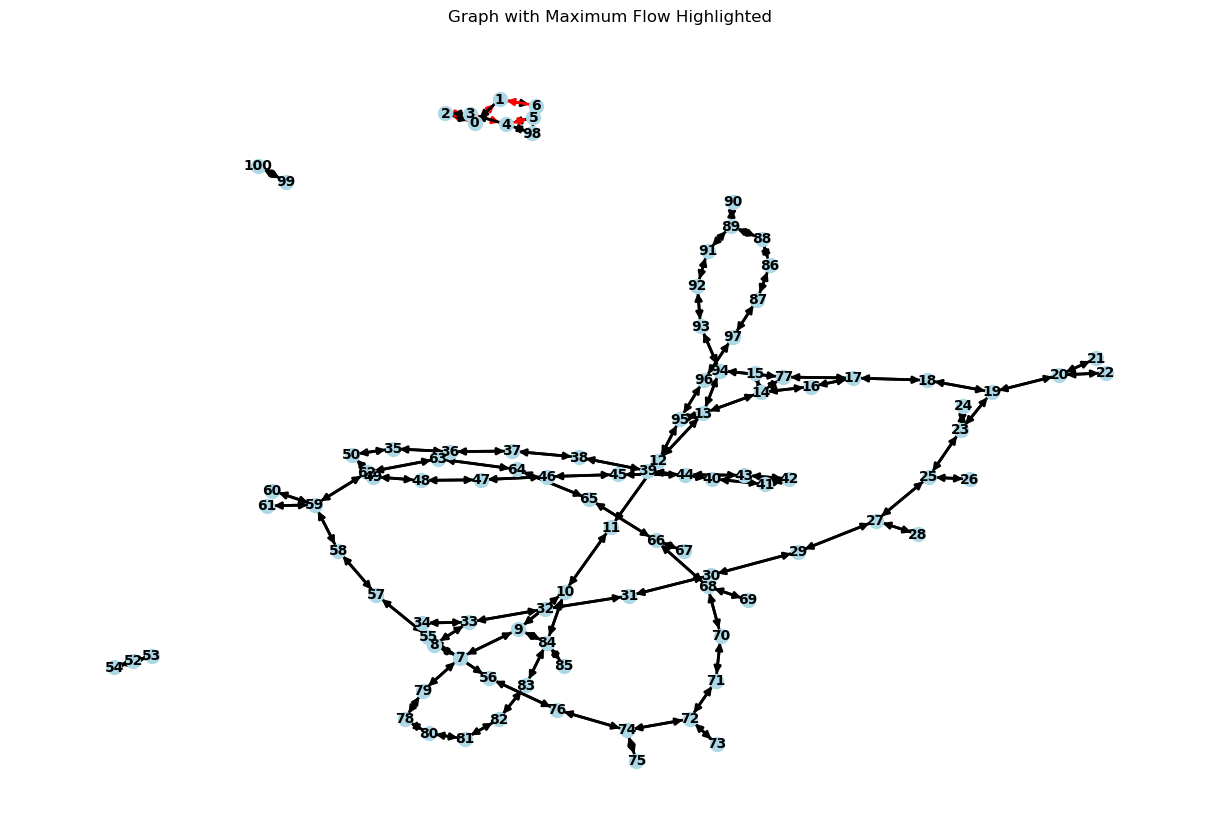

In [55]:
# Probably after applying maximum flow???

# Create a color map based on the flow
edge_colors = []
for u, v in G.edges():
    flow = flow_dict[u][v]
    if flow > 0:
        edge_colors.append('red')  # Flow is present
    else:
        edge_colors.append('black') # No flow

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, width=2, 
        node_color='lightblue', node_size=100, font_size=10, font_weight='bold')
plt.title("Graph with Maximum Flow Highlighted")
plt.show()


# In this plot, edges where flow occurs are colored red, and other edges are black.
# This will help you visualize the path of the maximum flow from the source to the sink in your graph.

In [56]:
print("Maximum flow value:", flow_value)
print("Flow along each path:", flow_dict)

Maximum flow value: 10
Flow along each path: {0: {1: 5, 2: 5}, 1: {0: 0, 6: 0}, 2: {0: 0, 3: 5}, 6: {1: 5, 5: 0}, 3: {2: 0, 4: 5}, 5: {4: 0, 6: 5, 98: 0}, 4: {3: 0, 5: 5, 98: 0}, 98: {4: 0, 5: 0}, 7: {8: 0, 9: 0, 79: 0}, 8: {7: 0, 33: 0}, 9: {7: 0, 10: 0, 84: 0}, 79: {7: 0, 78: 0}, 33: {8: 0, 32: 0, 34: 0}, 10: {9: 0, 11: 0, 84: 0}, 84: {9: 0, 10: 0, 83: 0, 85: 0}, 78: {79: 0, 80: 0}, 32: {31: 0, 33: 0}, 34: {33: 0}, 11: {10: 0, 12: 0}, 83: {82: 0, 84: 0}, 85: {84: 0}, 12: {11: 0, 13: 0, 95: 0}, 13: {12: 0, 14: 0, 94: 0, 95: 0}, 95: {12: 0, 13: 0, 96: 0}, 14: {13: 0, 15: 0, 16: 0, 77: 0}, 94: {13: 0, 77: 0, 93: 0}, 96: {95: 0, 97: 0}, 15: {14: 0}, 16: {14: 0, 17: 0}, 77: {14: 0, 17: 0, 94: 0}, 93: {92: 0, 94: 0}, 17: {16: 0, 18: 0, 77: 0}, 18: {17: 0, 19: 0}, 19: {18: 0, 20: 0, 23: 0}, 20: {19: 0, 21: 0, 22: 0}, 23: {19: 0, 24: 0, 25: 0}, 21: {20: 0}, 22: {20: 0}, 24: {23: 0}, 25: {23: 0, 26: 0, 27: 0}, 26: {25: 0}, 27: {25: 0, 28: 0, 29: 0}, 28: {27: 0}, 29: {27: 0, 30: 0}, 30: {29: 0

In [47]:
import csv

file_path = 'flow_data.csv'

with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Path', 'Flow'])
    for path, flow in flow_dict.items():
        writer.writerow([path, flow])
    writer.writerow(['Total Flow', flow_value])